In [30]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

In [29]:
np.random.seed(42)
X = np.random.rand(100,1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

array([[0.0515729 , 0.03227018, 0.05180858, ..., 0.06427814, 0.06105509,
        0.08857971],
       [0.61378251, 0.59447979, 0.6140182 , ..., 0.62648776, 0.6232647 ,
        0.65078932],
       [0.16581592, 0.1465132 , 0.16605161, ..., 0.17852117, 0.17529811,
        0.20282273],
       ...,
       [0.02010327, 0.00080054, 0.02033895, ..., 0.03280851, 0.02958545,
        0.05711007],
       [0.68003337, 0.66073065, 0.68026905, ..., 0.69273861, 0.68951556,
        0.71704018],
       [0.46559975, 0.44629703, 0.46583544, ..., 0.478305  , 0.47508194,
        0.50260656]])

In [35]:
df = pd.DataFrame(X,columns=['X'])

In [37]:
df['y'] = y

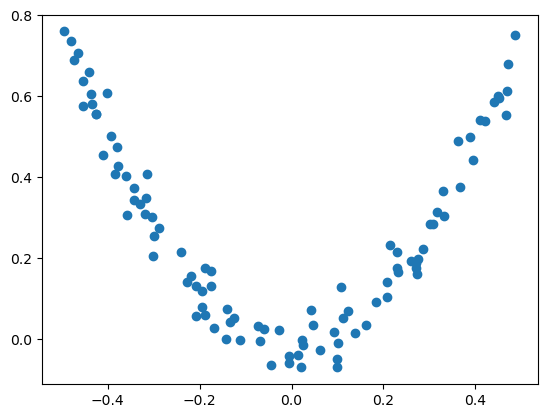

In [38]:
plt.scatter(df['X'],df['y'])

In [39]:
df['pred1'] = df['y'].mean()

In [40]:
df

,X,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [43]:
df['res1'] = df['y'] - df['pred1']

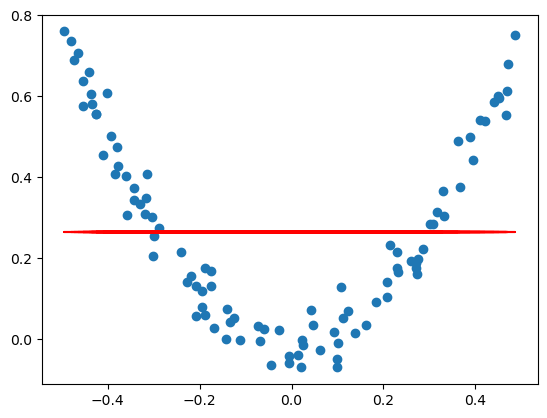

In [53]:
plt.plot(df['X'],df['pred1'],c='r')
plt.scatter(df['X'],df['y'])
plt.show()

In [56]:
df.head()

,X,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528


In [62]:
from sklearn.tree import DecisionTreeRegressor,plot_tree

In [83]:
tree1 = DecisionTreeRegressor(max_depth=5)

In [84]:
tree1.fit(df['X'].values.reshape(100,1),df['res1'].values)

DecisionTreeRegressor(max_depth=5)

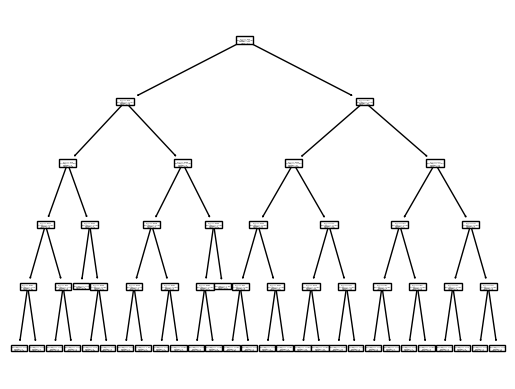

In [85]:
plot_tree(tree1)
plt.show()

In [86]:
X_test = np.linspace(-0.5, 0.5,500)

In [87]:
ypredM1M2 = df['y'].mean() + tree1.predict(X_test.reshape(500,1))

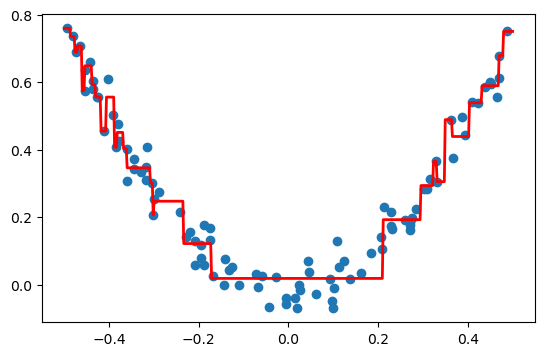

In [88]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test,ypredM1M2,linewidth=2,c='r')
plt.scatter(df['X'],df['y'])
plt.show()

In [91]:
df['ypred2'] = df['y'].mean() + tree1.predict(df['X'].values.reshape(100,1))

In [95]:
df.head()

,X,y,pred1,res1,ypred2
0,-0.125460,0.051573,0.265458,-0.213885,0.018320
1,0.450714,0.594480,0.265458,0.329021,0.589243
2,0.231994,0.166052,0.265458,-0.099407,0.192459
3,0.098658,-0.070178,0.265458,-0.335636,0.018320
4,-0.343981,0.343986,0.265458,0.078528,0.346121


In [96]:
df['res2'] = df['y'] - df['ypred2']

In [97]:
df.head()

,X,y,pred1,res1,ypred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018320,0.033253
1,0.450714,0.594480,0.265458,0.329021,0.589243,0.005237
2,0.231994,0.166052,0.265458,-0.099407,0.192459,-0.026408
3,0.098658,-0.070178,0.265458,-0.335636,0.018320,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.346121,-0.002135


In [98]:
tree2 = DecisionTreeRegressor(max_depth=5)

In [99]:
tree2.fit(df['X'].values.reshape(100,1),df['res2'].values)

DecisionTreeRegressor(max_depth=5)

In [ ]:
ypredM1M2M3 = df['y'].mean() + tree1.predict(df['X'].values.reshape(-1,1))
+ tree2.predict(`)

In [103]:
 sum(regressor.predict(X_test.reshape(-1, 1)) for regressor in [tree1,tree2])

array([ 0.49160749,  0.49160749,  0.49160749,  0.49160749,  0.49160749,
        0.49160749,  0.49160749,  0.46727307,  0.46727307,  0.46727307,
        0.46727307,  0.46727307,  0.42150084,  0.42150084,  0.42150084,
        0.43950857,  0.43950857,  0.43950857,  0.43950857,  0.43950857,
        0.30646872,  0.30646872,  0.30646872,  0.38052989,  0.38052989,
        0.38052989,  0.38052989,  0.38052989,  0.38052989,  0.38052989,
        0.38052989,  0.32433003,  0.32433003,  0.32433003,  0.32433003,
        0.28791184,  0.28791184,  0.28791184,  0.28800088,  0.28800088,
        0.28800088,  0.18688536,  0.18688536,  0.18688536,  0.18688536,
        0.18688536,  0.18688536,  0.28767121,  0.28767121,  0.28767121,
        0.28767121,  0.28767121,  0.28767121,  0.28767121,  0.28767121,
        0.28767121,  0.13893745,  0.13893745,  0.13893745,  0.18301444,
        0.18301444,  0.18301444,  0.18301444,  0.18301444,  0.18301444,
        0.18301444,  0.13493207,  0.13493207,  0.13493207,  0.13